In [1]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv 

In [2]:
loc = r"C:\Users\Natsu\Downloads\BrainTumorData\BrainTumorData\Brain Tumor Data Set"


In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(loc, subset='training', seed=123, validation_split=0.3, batch_size=32, image_size=(120,120))

Found 4514 files belonging to 2 classes.
Using 3160 files for training.


In [4]:
valid_data = tf.keras.utils.image_dataset_from_directory(loc, subset='validation', validation_split=0.3,seed=123, batch_size=32, image_size=(120, 120))

Found 4514 files belonging to 2 classes.
Using 1354 files for validation.


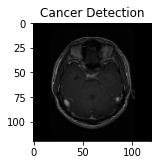

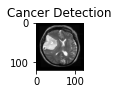

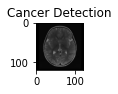

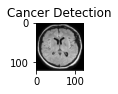

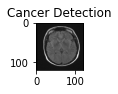

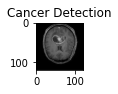

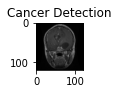

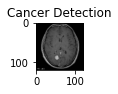

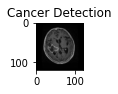

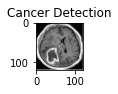

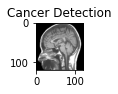

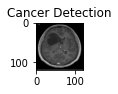

In [5]:
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range(12):
        plot = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title('Cancer Detection')
        plt.show()
        #plt.axis('off')

In [6]:
data_aug = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.5),
    keras.layers.RandomZoom(0.34)
])

In [7]:
Autotune = tf.data.AUTOTUNE
train_data = train_data.prefetch(buffer_size=Autotune)
valid_data = valid_data.prefetch(buffer_size=Autotune)

In [8]:
valid_batches = tf.data.experimental.cardinality(valid_data)
test_data = valid_data.take(valid_batches//5)
valid_data = valid_data.skip(valid_batches//5)

In [9]:
test_data = test_data.prefetch(buffer_size=Autotune)

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=16, activation='relu', kernel_size=(3,3), input_shape=(120,120,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_data, validation_data=valid_data, epochs=10, verbose=1, batch_size=32)

Epoch 1/10
99/99 [==============================] - 87s 414ms/step - loss: 4.2764 - accuracy: 0.7392 - val_loss: 0.3889 - val_accuracy: 0.8342
Epoch 2/10
99/99 [==============================] - 22s 220ms/step - loss: 0.2598 - accuracy: 0.8959 - val_loss: 0.2305 - val_accuracy: 0.9080
Epoch 3/10
99/99 [==============================] - 15s 148ms/step - loss: 0.1663 - accuracy: 0.9351 - val_loss: 0.1625 - val_accuracy: 0.9290
Epoch 4/10
99/99 [==============================] - 24s 238ms/step - loss: 0.0669 - accuracy: 0.9801 - val_loss: 0.1202 - val_accuracy: 0.9545
Epoch 5/10
99/99 [==============================] - 21s 213ms/step - loss: 0.0401 - accuracy: 0.9883 - val_loss: 0.0969 - val_accuracy: 0.9699
Epoch 6/10
99/99 [==============================] - 22s 222ms/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.1749 - val_accuracy: 0.9490
Epoch 7/10
99/99 [==============================] - 20s 206ms/step - loss: 0.0323 - accuracy: 0.9924 - val_loss: 0.0679 - val_accuracy: 0.9791

In [13]:
 model.evaluate(test_data)

8/8 [==============================] - 0s 20ms/step - loss: 0.1295 - accuracy: 0.9688


[0.12954245507717133, 0.96875]

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)      

In [15]:
history = model.fit(train_data, validation_data=valid_data, epochs=13, verbose=1, batch_size=32)

Epoch 1/13
99/99 [==============================] - 21s 149ms/step - loss: 6.6997e-04 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9763
Epoch 2/13
99/99 [==============================] - 20s 207ms/step - loss: 3.1606e-04 - accuracy: 1.0000 - val_loss: 0.0815 - val_accuracy: 0.9781
Epoch 3/13
99/99 [==============================] - 22s 217ms/step - loss: 2.2424e-04 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9827
Epoch 4/13
99/99 [==============================] - 20s 201ms/step - loss: 1.7914e-04 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9781
Epoch 5/13
99/99 [==============================] - 20s 206ms/step - loss: 1.4768e-04 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9781
Epoch 6/13
99/99 [==============================] - 14s 143ms/step - loss: 1.2508e-04 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9763
Epoch 7/13
99/99 [==============================] - 22s 168ms/step - loss: 1.0988e-04 - accuracy: 1.0000 - val_loss: 0

In [16]:
acc = history.history['accuracy']

100.0%  This Is  Its not a tumor


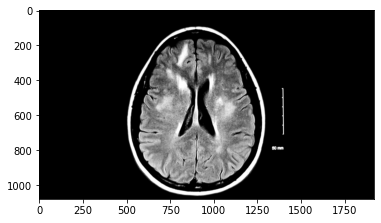

In [17]:
from PIL import Image

def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return ' Its not a tumor'
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Natsu\Downloads\BrainTumorData\BrainTumorData\Brain Tumor Data Set\Healthey\Not Cancer  (1).png")
x = np.array(img.resize((120,120)))
x = x.reshape(1,120,120,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% ' + names(classification))

In [18]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]